### Definição do problema do negócio 




Aplicar analise técnica utizando Média Móvel Simples(Simple move average) num conjunto de dados de fechamento de Preços de Bitcoin.
Vou utilizar a API do Mercado Bitcoin

Um dos principais papéis da média móvel é realizar uma espécie de filtragem dos dados. Por causa da forma de cálculo, ela é levemente defasada, já que aborda dados históricos e já consolidados.

Por outro lado, também é mais representativa, porque desconsidera flutuações pontuais e que não se consolidam como tendência. Portanto, ela ajuda a entender melhor o padrão de comportamento de preços, como os de fechamento das Ações.

Por causa de tal característica, são muito utilizadas na análise técnica ou gráfica. Como essa modalidade de avaliação considera as oscilações de preços para perceber tendências, as médias são uma ideia clara do comportamento e das alterações.

Sendo assim, a média móvel pode ser indicada para quem adota uma estratégia de especulação na bolsa, em busca do aproveitamento de condições de curto ou curtíssimo prazo.

Como a média móvel pode compreender diversas faixas de períodos, pode servir tanto para quem faz day trade quanto para quem faz swing trade ou scalping. Afinal, ela se adapta a prazos diferentes para as operações.


### Fonte de Dados

Irei utilizar a API disponibilizada pelo mercado bitcoin na url https://www.mercadobitcoin.com.br/api-doc/

## Instalação dos pacotes


**instalacao da lib do mercado bitcoin**<br>
URL da biblioteca para mais informações:<BR> https://github.com/mbampi/mercado-bitcoin

In [ ]:
#!pip install mercado-bitcoin

## Importação dos Pacotes

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
import time
from datetime import datetime , timedelta,date
#importação da lib do mercado mercado bitcoin
from mercado_bitcoin import DataAPI
import json
from pandas.io.json import json_normalize

#Desabilitar warnings
import warnings
warnings.filterwarnings('ignore')


## Extração dos Dados em Tempo Real

In [8]:
#definir uma variável com o valor em dias para resgatar da exchange
dias_resgatar = 120

**Loop para retornar os ultimos 120 dias no mercado bitcoin**

In [20]:
df_temp = pd.DataFrame()  
for x in range(1, dias_resgatar):
  #print(date.today() - timedelta(days=x))
  dt = date.today() - timedelta(days=x)
  dia,mes,ano = dt.day,dt.month,dt.year
  resp = DataAPI.day_summary('BTC', ano, mes, dia).json() 
  df_temp = pd.concat([json_normalize(resp),df_temp])
  time.sleep(1)
  print('Adicionando data: ' + str(dt) )

Adicionando data: 2021-08-26
Adicionando data: 2021-08-25
Adicionando data: 2021-08-24
Adicionando data: 2021-08-23
Adicionando data: 2021-08-22
Adicionando data: 2021-08-21
Adicionando data: 2021-08-20
Adicionando data: 2021-08-19
Adicionando data: 2021-08-18
Adicionando data: 2021-08-17
Adicionando data: 2021-08-16
Adicionando data: 2021-08-15
Adicionando data: 2021-08-14
Adicionando data: 2021-08-13
Adicionando data: 2021-08-12
Adicionando data: 2021-08-11
Adicionando data: 2021-08-10
Adicionando data: 2021-08-09
Adicionando data: 2021-08-08
Adicionando data: 2021-08-07
Adicionando data: 2021-08-06
Adicionando data: 2021-08-05
Adicionando data: 2021-08-04
Adicionando data: 2021-08-03
Adicionando data: 2021-08-02
Adicionando data: 2021-08-01
Adicionando data: 2021-07-31
Adicionando data: 2021-07-30
Adicionando data: 2021-07-29
Adicionando data: 2021-07-28
Adicionando data: 2021-07-27
Adicionando data: 2021-07-26
Adicionando data: 2021-07-25
Adicionando data: 2021-07-24
Adicionando da

In [21]:
#salvar o csv para analise
df_temp.to_csv('df_mb.csv', index = False)

### Carregando e Explorando o Arquivo de Dados

In [22]:
df = pd.read_csv('df_mb.csv',sep=';')
df.head()


,date,opening,closing,lowest,highest,volume,quantity,amount,avg_price
0,2021-04-25,284499.89365,293998.52829,267150.00000,297099.99999,4.047880e+07,144.145199,14620,280819.586525
1,2021-04-26,293998.52765,296992.91000,292000.00001,309000.00000,6.768143e+07,226.228466,20725,299172.898811
2,2021-04-27,296992.90955,305499.97002,295000.00000,309143.78989,3.416446e+07,113.042899,15751,302225.635101
3,2021-04-28,305833.86199,294399.98982,292098.81537,305899.99000,2.774135e+07,92.801838,13691,298931.007232
4,2021-04-29,294399.98824,288809.90999,282360.00000,294399.99320,2.599753e+07,90.041518,15194,288728.202573


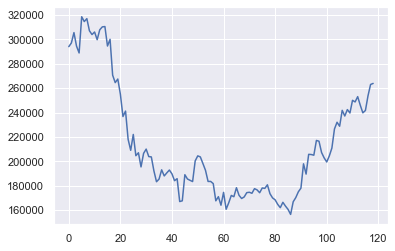

In [23]:
#Verificando os fechamentos
df['closing'].plot()

Função para calcular o cruzamento das médias móveis 

In [24]:
short_window = int(0.035 * len(df))
long_window = int(0.05 * len(df))

signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0

signals['short_ma'] = df['closing'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_ma'] = df['closing'].rolling(window=long_window, min_periods=1, center=False).mean()

#se cruzar para cima, sinal de compra, se cruzar para baixo, sinal de venda
signals['signal'][short_window:] = np.where(signals['short_ma'][short_window:] 
                                            > signals['long_ma'][short_window:], 1.0, 0.0)   
signals['positions'] = signals['signal'].diff()

signals

,signal,short_ma,long_ma,positions
0,0.0,293998.528290,293998.528290,NaN
1,0.0,295495.719145,295495.719145,0.0
2,0.0,298830.469437,298830.469437,0.0
3,0.0,297722.849532,297722.849532,0.0
4,1.0,296425.694957,295940.261624,1.0
...,...,...,...,...
114,0.0,246848.287500,247478.621998,-1.0
115,0.0,245096.512353,245809.429882,0.0
116,0.0,245264.354853,246812.483882,0.0
117,1.0,249510.224852,248808.177882,1.0


In [25]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    
    real_movement = movimento real no mundo real
    delay = quanto intervalo você deseja atrasar para mudar nossa decisão de comprar para vender, vice-versa
    initial_state = 1 é compra, 0 é venda
    initial_money = 1000
    max_buy = quantidade máxima para compra de ações
    max_sell = quantidade máxima de compartilhamento para vender
    
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // (real_movement[i]*max_buy)
        if shares < 1:
            print(
                'dia %d: Balanço total %f, não há dinheiro suficiente para comprar pelo preço %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'dia %d: compra de %f BTCs no valor de  %f, Saldo %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('dia %d: não pode vender nada, estoque 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'Dia %d, venda de  %f BTCs no valor de %f, investimento %f %%, Saldo %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [26]:
states_buy, states_sell, total_gains, invest = buy_stock(df.closing, signals['positions'],1000,0.001,0.001)

dia 4: compra de 0.001000 BTCs no valor de  288.809910, Saldo 711.190090
Dia 6, venda de  0.001000 BTCs no valor de 314.550004, investimento 8.912469 %, Saldo 1025.740094,
dia 7: compra de 0.001000 BTCs no valor de  316.941010, Saldo 708.799084
Dia 9, venda de  0.001000 BTCs no valor de 303.900000, investimento -4.114649 %, Saldo 1012.699084,
dia 13: compra de 0.001000 BTCs no valor de  310.200080, Saldo 702.499004
Dia 16, venda de  0.001000 BTCs no valor de 300.000000, investimento -3.288226 %, Saldo 1002.499004,
dia 30: compra de 0.001000 BTCs no valor de  210.000000, Saldo 792.499004
Dia 31, venda de  0.001000 BTCs no valor de 203.880000, investimento -2.914286 %, Saldo 996.379004,
dia 32: compra de 0.001000 BTCs no valor de  203.573880, Saldo 792.805124
Dia 33, venda de  0.001000 BTCs no valor de 192.142599, investimento -5.615298 %, Saldo 984.947723,
dia 38: compra de 0.001000 BTCs no valor de  190.509120, Saldo 794.438604
Dia 40, venda de  0.001000 BTCs no valor de 189.670000, in

**Plot dos Sinais e Resultado da Estratégia**

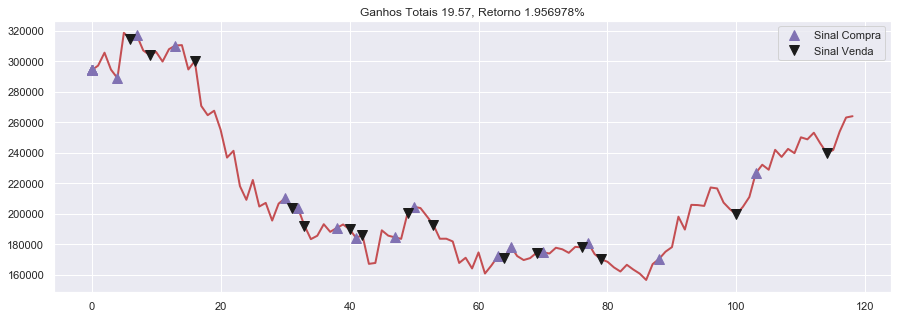

In [27]:
close = df['closing']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'Sinal Compra', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'Sinal Venda', markevery = states_sell)
plt.title(f'Ganhos Totais {total_gains:.2f}, Retorno %f%%'%( invest))
plt.legend()
plt.show()

### Conclusão

A estratégia demonstrou bons resultados com baixo volume de dados, o ideal seria testar com um volume mais de dados.